In [289]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [290]:
prefix_path = "../results/"

In [291]:
scores = {}
for model in ['gat','gcn']:
    scores[model] = {}
    for dataset in os.listdir(f"{prefix_path}/{model}"):
        dataset_filez = []
        for file in  os.listdir(f"{prefix_path}/{model}/{dataset}"):
            path = f"{prefix_path}/{model}/{dataset}/{file}"
            if 'ipynb' in path or 'raw' in path: continue
            data = pd.read_csv(path)
            #print(new_data)
            dataset_filez.append(data)
        if len(dataset_filez) > 0: scores[model][dataset] = pd.concat(dataset_filez)

In [375]:
results = {}
for model in ['gat','gcn']:
    results[model] = []
    for dataset in scores[model]:
        print(model, dataset)
        df = scores[model][dataset]
        cols = ['test', 'total_train_time']
        if model == 'gcn':
            df = df.rename(columns=dict(zip(['micro', 'train_time'], cols)))
        test_df = df[cols].reset_index()
        test_df['name'] = dataset 
        for mode in cols:
            if model == 'gcn' and mode == 'total_train_time':
                m, s = sum(test_df[mode])/10, test_df[mode].std(axis=0)/10
            else:
                m, s = test_df[mode].mean(axis=0), test_df[mode].std(axis=0)              
            line = [dataset, mode, m, s]
            results[model].append(line)


gat mbti
gat pan-2017-gender
gat semeval2019
gat pan-2017-age
gat AAAI2021_COVID19_fake_news
gat bbc
gat semeval-2017-sentiment
gat pan2020
gcn mbti
gcn pan-2017-gender
gcn semeval2019
gcn pan-2017-age
gcn AAAI2021_COVID19_fake_news
gcn bbc
gcn semeval-2017-sentiment
gcn pan2020


In [376]:
results['gcn']

[['mbti', 'test', 0.1341894392640028, 0.05631569748167776],
 ['mbti', 'total_train_time', 762.6831874608994, 0.578265191559576],
 ['pan-2017-gender', 'test', 0.5669399512943443, 0.038291309881270434],
 ['pan-2017-gender',
  'total_train_time',
  288.2131238937378,
  0.1940075115017364],
 ['semeval2019', 'test', 0.6040221397877864, 0.04878938644882856],
 ['semeval2019', 'total_train_time', 1098.3703209400178, 0.7023348989116032],
 ['pan-2017-age', 'test', 0.3445298235963942, 0.08028884398088655],
 ['pan-2017-age', 'total_train_time', 89.05768432617188, 0.029807007855861833],
 ['AAAI2021_COVID19_fake_news',
  'test',
  0.7380553933021806,
  0.06811646638251331],
 ['AAAI2021_COVID19_fake_news',
  'total_train_time',
  905.503603219986,
  0.8925779910831318],
 ['bbc', 'test', 0.7937499150923806, 0.10046972682219252],
 ['bbc', 'total_train_time', 191.264155626297, 0.10950736298977075],
 ['semeval-2017-sentiment', 'test', 0.4622669164512977, 0.09343587068614978],
 ['semeval-2017-sentiment',


In [377]:
dict(zip(['micro', 'train_time'], cols))

{'micro': 'test', 'train_time': 'total_train_time'}

In [491]:
df1 = pd.DataFrame( results['gat'], columns = ['dataset','dim','mean','std'])
df1 = df1[df1['dim'] == 'test']
df1 = df1.sort_values('dataset').reset_index()
df1.index = df1.dataset

In [492]:
df1['model'] = ['gat'] * len(df1)

In [493]:
df2 = pd.DataFrame(results['gcn'], columns = ['dataset','dim','mean','std'])
df2 = df2[df2['dim'] == 'test']
df2 = df2.sort_values('dataset').reset_index()
df2.index = df2.dataset

In [494]:
df2['model'] = ['gcn'] * len(df2)

In [495]:
df2

index                     dataset   dim      mean  \
dataset                                                                         
AAAI2021_COVID19_fake_news      8  AAAI2021_COVID19_fake_news  test  0.738055   
bbc                            10                         bbc  test  0.793750   
mbti                            0                        mbti  test  0.134189   
pan-2017-age                    6                pan-2017-age  test  0.344530   
pan-2017-gender                 2             pan-2017-gender  test  0.566940   
pan2020                        14                     pan2020  test  0.562926   
semeval-2017-sentiment         12      semeval-2017-sentiment  test  0.462267   
semeval2019                     4                 semeval2019  test  0.604022   

                                 std model  
dataset                                     
AAAI2021_COVID19_fake_news  0.068116   gcn  
bbc                         0.100470   gcn  
mbti                        0.056316   gcn  
pan-2017-age                0.080289   gcn  
pan-2017-gender             0.038291   gcn  
pan2020                     0.062034   gcn  
semeval-2017-sentiment      0.093436   gcn  
semeval2019                 0.048789   gcn

In [505]:
df3 = pd.read_csv('linkbert_results.csv')
df3 = df3[df3['dim'] == 'micro']
df3 = df3.sort_values('dataset')#.reset_index()

df3

dataset                   dataset.1    dim      mean  \
8   AAAI2021_COVID19_fake_news  AAAI2021_COVID19_fake_news  micro  0.980234   
10                         bbc                         bbc  micro  0.986364   
0                         mbti                        mbti  micro  0.569571   
6                 pan-2017-age                pan-2017-age  micro  0.388119   
2              pan-2017-gender             pan-2017-gender  micro  0.752333   
14                     pan2020                     pan2020  micro  0.647500   
12      semeval-2017-sentiment      semeval-2017-sentiment  micro  0.680623   
4                  semeval2019                 semeval2019  micro  0.774411   

         std  
8   0.002761  
10  0.004791  
0   0.007457  
6   0.047092  
2   0.011540  
14  0.034420  
12  0.015819  
4   0.002687

In [506]:
df4 = pd.read_csv('roberta_results.csv')
df4 = df4[df4['dim'] == 'micro']#.reset_index()
df4 = df4.sort_values('dataset')#.reset_index()

df4

dataset                   dataset.1    dim      mean  \
8   AAAI2021_COVID19_fake_news  AAAI2021_COVID19_fake_news  micro  0.981963   
10                         bbc                         bbc  micro  0.981534   
0                         mbti                        mbti  micro  0.346888   
6                 pan-2017-age                pan-2017-age  micro  0.435644   
2              pan-2017-gender             pan-2017-gender  micro  0.744444   
14                     pan2020                     pan2020  micro  0.672500   
12      semeval-2017-sentiment      semeval-2017-sentiment  micro  0.729412   
4                  semeval2019                 semeval2019  micro  0.773716   

         std  
8   0.002033  
10  0.004288  
0   0.130034  
6   0.022384  
2   0.005024  
14  0.020716  
12  0.044576  
4   0.004472

In [558]:
df4

dataset                   dataset.1    dim      mean  \
8   AAAI2021_COVID19_fake_news  AAAI2021_COVID19_fake_news  micro  0.981963   
10                         bbc                         bbc  micro  0.981534   
0                         mbti                        mbti  micro  0.346888   
6                 pan-2017-age                pan-2017-age  micro  0.435644   
2              pan-2017-gender             pan-2017-gender  micro  0.744444   
14                     pan2020                     pan2020  micro  0.672500   
12      semeval-2017-sentiment      semeval-2017-sentiment  micro  0.729412   
4                  semeval2019                 semeval2019  micro  0.773716   

         std  
8   0.002033  
10  0.004288  
0   0.130034  
6   0.022384  
2   0.005024  
14  0.020716  
12  0.044576  
4   0.004472

In [562]:
df1['std']

dataset
AAAI2021_COVID19_fake_news    0.003105
bbc                           0.008376
mbti                          0.000000
pan-2017-age                  0.000000
pan-2017-gender               0.003715
pan2020                       0.004645
semeval-2017-sentiment        0.035612
semeval2019                        NaN
Name: std, dtype: float64

In [546]:
naive_d2g = [0.912,0.946,0.2116,0.4554,0.6078,0.645,0.5536,0]

In [581]:
df_final = pd.DataFrame()
df_final['GAT'] = df1['mean'].astype(str).str[:6].astype(float).to_list()
#df_final['GAT_m'] = df1['std'].astype(str).str[:6].astype(float).to_list()
df_final['GCN'] = df2['mean'].astype(str).str[:6].astype(float).to_list()
#df_final['GCN_m'] = df2['std'].astype(str).str[:6].astype(float).to_list()
df_final['LinkBERT'] = df3['mean'].astype(str).str[:6].astype(float).to_list()
#df_final['LinkBERT_m'] = df3['std'].astype(str).str[:6].astype(float).to_list()
df_final['RoBERTa'] = df4['mean'].astype(str).str[:6].astype(float).to_list()
#df_final['RoBERTa_m'] = df4['std'].astype(str).str[:6].astype(float).to_list()

df_final['d2g'] = naive_d2g
#df_final['dataset'] = df1.dataset.to_list()
df_final.index = df1.dataset

In [582]:
cols = list(df_final.columns)
cols.sort()
df_final = df_final[cols]

In [583]:
df_final

GAT     GCN  LinkBERT  RoBERTa     d2g
dataset                                                              
AAAI2021_COVID19_fake_news  0.8229  0.7380    0.9802   0.9819  0.9120
bbc                         0.6404  0.7937    0.9863   0.9815  0.9460
mbti                        0.5072  0.1341    0.5695   0.3468  0.2116
pan-2017-age                0.7335  0.3445    0.3881   0.4356  0.4554
pan-2017-gender             0.6823  0.5669    0.7523   0.7444  0.6078
pan2020                     0.6697  0.5629    0.6475   0.6725  0.6450
semeval-2017-sentiment      0.5458  0.4622    0.6806   0.7294  0.5536
semeval2019                    NaN  0.6040    0.7744   0.7737  0.0000

In [579]:
print(df_final.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &     GAT &   GAT\_m &     GCN &   GCN\_m &  LinkBERT &  LinkBERT\_m &  RoBERTa &  RoBERTa\_m &     d2g \\
dataset                    &         &         &         &         &           &             &          &            &         \\
\midrule
AAAI2021\_COVID19\_fake\_news &  0.8229 &  0.0031 &  0.7380 &  0.0681 &    0.9802 &      0.0027 &   0.9819 &     0.0020 &  0.9120 \\
bbc                        &  0.6404 &  0.0083 &  0.7937 &  0.1004 &    0.9863 &      0.0047 &   0.9815 &     0.0042 &  0.9460 \\
mbti                       &  0.5072 &  0.0000 &  0.1341 &  0.0563 &    0.5695 &      0.0074 &   0.3468 &     0.1300 &  0.2116 \\
pan-2017-age               &  0.7335 &  0.0000 &  0.3445 &  0.0802 &    0.3881 &      0.0470 &   0.4356 &     0.0223 &  0.4554 \\
pan-2017-gender            &  0.6823 &  0.0037 &  0.5669 &  0.0382 &    0.7523 &      0.0115 &   0.7444 &     0.0050 &  0.6078 \\
pan2020                    &  0.6697 &  0.0046 &  0.5629 &  0

<AxesSubplot:ylabel='dataset'>

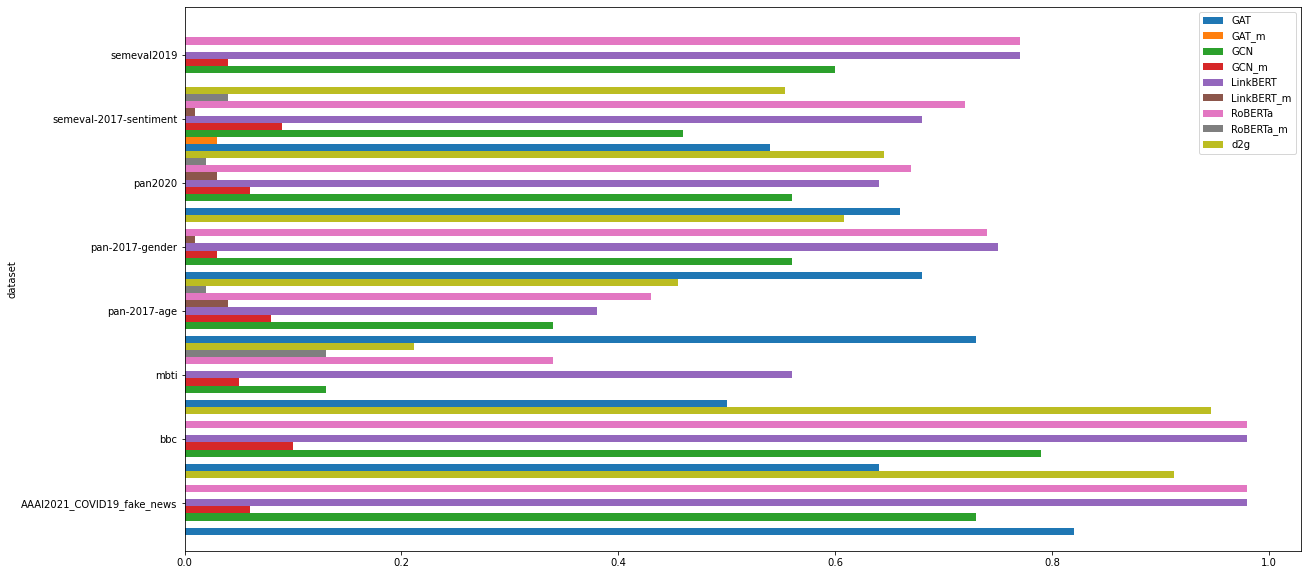

In [552]:
df_final.plot(kind='barh',figsize=(20,10),width=1)

In [510]:
tidy = df_final.melt(id_vars='Factor')#.rename(columns=str.title)


[Text(0, 0, 'AAAI2021_COVID19_fake_news'),
 Text(1, 0, 'bbc'),
 Text(2, 0, 'mbti'),
 Text(3, 0, 'pan-2017-age'),
 Text(4, 0, 'pan-2017-gender'),
 Text(5, 0, 'pan2020'),
 Text(6, 0, 'semeval-2017-sentiment'),
 Text(7, 0, 'semeval2019')]

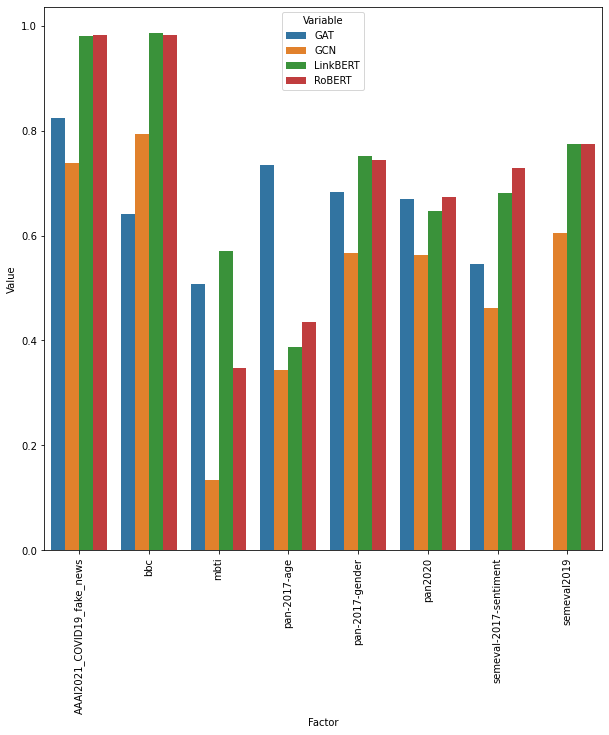

In [527]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df_final.melt(id_vars='Factor').rename(columns=str.title)
g = sns.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
locs, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)



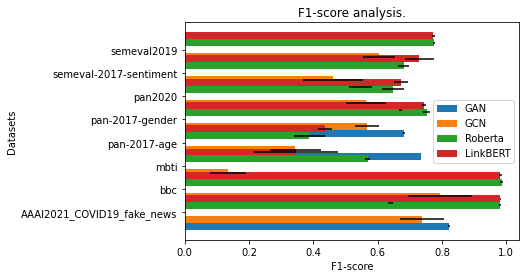

In [445]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = df1.dataset

X_axis = np.arange(len(X))
  
plt.barh(X_axis - 0.60,  df1['mean'], 0.3, xerr=df1['std'], label = 'GAN' )
plt.barh(X_axis - 0.30, df2['mean'], 0.3, xerr=df2['std'],label = 'GCN')
plt.barh(X_axis + 0.30, df3['mean'],0.3,  xerr=df3['std'],label = 'Roberta')
plt.barh(X_axis +0.60, df4['mean'], 0.3, xerr=df4['std'],label = 'LinkBERT')
    
plt.yticks(X_axis, X, rotation = 0)

plt.ylabel("Datasets")
plt.xlabel("F1-score")
plt.title("F1-score analysis.")
plt.legend()
plt.show()

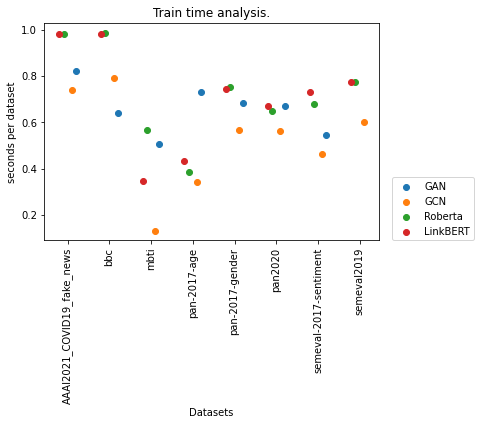

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = df1.dataset

X_axis = np.arange(len(X))
  
plt.scatter(X_axis + 0.2,  df1['mean'], label = 'GAN')
plt.scatter(X_axis + 0.1, df2['mean'], label = 'GCN')
plt.scatter(X_axis - 0.1, df3['mean'],  label = 'Roberta')
plt.scatter(X_axis - 0.2, df4['mean'], label = 'LinkBERT')
    
plt.xticks(X_axis, X, rotation = 90)

plt.xlabel("Datasets")
plt.ylabel("seconds per dataset")
plt.title("Train time analysis.")
plt.legend(loc=(1.04,0))
plt.show()